<a href="https://colab.research.google.com/github/nimrashaheen001/Programming_for_AI/blob/main/CVassignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

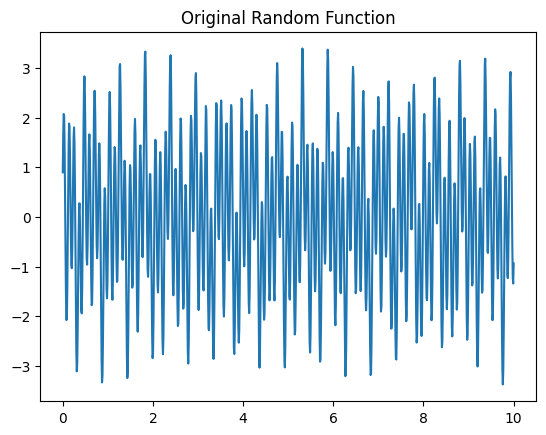

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Number of sinusoids to sum
n_sinusoids = 3

# Generate random frequencies, amplitudes, and phases for the sinusoids
frequencies = np.random.uniform(1, 10, n_sinusoids)
amplitudes = np.random.uniform(0.5, 2, n_sinusoids)
phases = np.random.uniform(0, 2*np.pi, n_sinusoids)

# Create a function f(x) as a sum of sinusoids
x = np.linspace(0, 10, 1000)
y_true = np.zeros_like(x)

for i in range(n_sinusoids):
    y_true += amplitudes[i] * np.sin(2 * np.pi * frequencies[i] * x + phases[i])

plt.plot(x, y_true)
plt.title('Original Random Function')
plt.show()

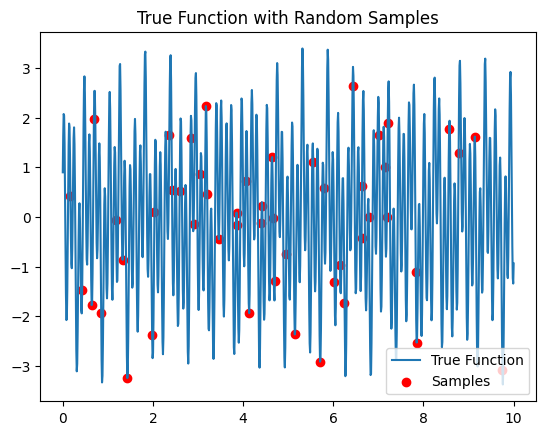

In [2]:
# Randomly select a few dozen sampling points
n_samples = 50
x_samples = np.sort(np.random.choice(x, n_samples, replace=False))
y_samples = np.interp(x_samples, x, y_true)

plt.plot(x, y_true, label='True Function')
plt.scatter(x_samples, y_samples, color='red', label='Samples')
plt.legend()
plt.title('True Function with Random Samples')
plt.show()

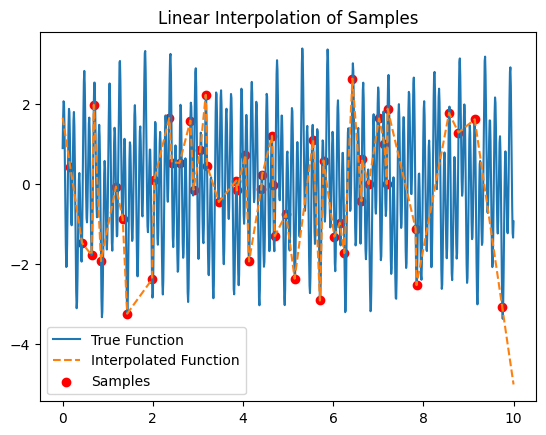

In [3]:
from scipy.interpolate import interp1d

# Perform linear interpolation
linear_interp = interp1d(x_samples, y_samples, kind='linear', fill_value="extrapolate")

# Generate interpolated values for a regular grid
x_interp = np.linspace(0, 10, 1000)
y_interp = linear_interp(x_interp)

# Plot the result
plt.plot(x, y_true, label='True Function')
plt.plot(x_interp, y_interp, label='Interpolated Function', linestyle='dashed')
plt.scatter(x_samples, y_samples, color='red', label='Samples')
plt.legend()
plt.title('Linear Interpolation of Samples')
plt.show()

In [4]:
from sklearn.metrics import mean_squared_error

# Calculate error on the interpolated grid
mse = mean_squared_error(y_true, y_interp)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 4.0271649462709265


Cubic Interpolation MSE: 23.597908915267627


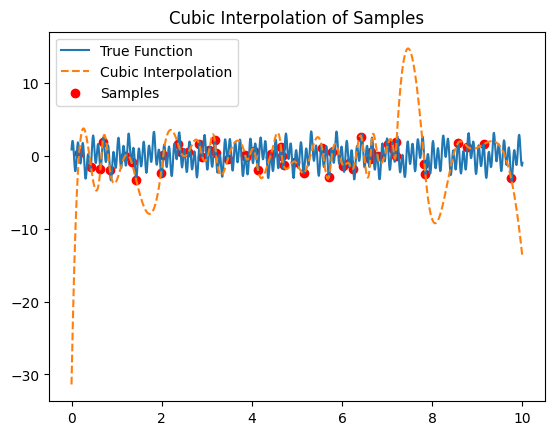

In [5]:
# Perform cubic interpolation
cubic_interp = interp1d(x_samples, y_samples, kind='cubic', fill_value="extrapolate")

y_cubic_interp = cubic_interp(x_interp)

# Calculate error and plot
mse_cubic = mean_squared_error(y_true, y_cubic_interp)
print(f'Cubic Interpolation MSE: {mse_cubic}')

plt.plot(x, y_true, label='True Function')
plt.plot(x_interp, y_cubic_interp, label='Cubic Interpolation', linestyle='dashed')
plt.scatter(x_samples, y_samples, color='red', label='Samples')
plt.legend()
plt.title('Cubic Interpolation of Samples')
plt.show()